In [1]:
%pylab inline
import scipy
from scipy.sparse import coo_matrix, block_diag, identity, hstack
#import matplotlib as mpl
import matplotlib.pyplot as plt
from pyiga import bspline, vform, geometry, vis, solvers, utils, topology
from pyiga import assemble
#from patchmesh import *
from sksparse.cholmod import cholesky
#from patchmesh3D import *
#from multipatch import *

from pyiga import bspline
from pyiga import utils
from pyiga.bspline import BSplineFunc
from pyiga.tensor import apply_tprod

import functools

numpy.set_printoptions(linewidth=100000)
numpy.set_printoptions(precision=5)

Populating the interactive namespace from numpy and matplotlib


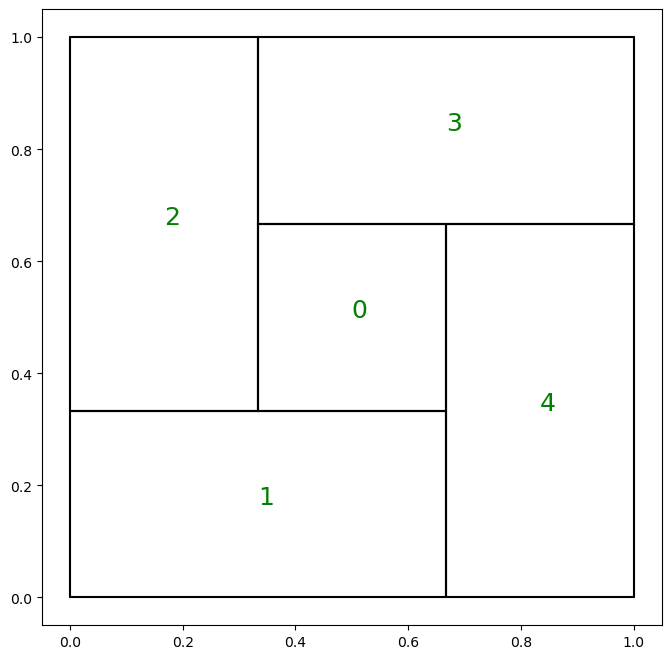

In [2]:
deg, N = 1,1
kvs = 5*[2 * (bspline.make_knots(deg, 0.0, 1.0, N),),]
geo1=geometry.unit_square(support=((1/3,2/3),(1/3,2/3)))
geo2=geometry.unit_square(support=((0.0,1/3),(0.0,2/3)))
geo3=geometry.unit_square(support=((1/3,1.0),(0.0,1/3)))
geo4=geometry.unit_square(support=((2/3,1.0),(1/3,1.0)))
geo5=geometry.unit_square(support=((0.0,2/3),(2/3,1.0)))

geos=[
    geo1,
    geo2,
    geo3,
    geo4,
    geo5
]
patches = [(tuple(bspline.mapto(k[d],lambda x: g.support[d][1]*x + g.support[d][0]*(1-x)) for d in range(2)), g) for k, g in zip(kvs,geos)]
#patches = [(k, g) for k, g in zip(kvs,geos)]

interfaces=[
    ((0,0,0),(1,1,1),False),
    ((0,2,0),(2,3,0),False),
    ((0,1,0),(3,0,0),False),
    ((0,3,0),(4,2,1),False),
    ((1,1,0),(2,0,0),False),
    ((2,3,1),(3,2,0),False),
    ((3,0,1),(4,1,0),False),
    ((4,2,0),(1,3,0),False)
]

# for g in geos:
#     vis.plot_geo(g,grid=2)
M = topology.PatchMesh(patches, interfaces)
M.draw(patch_idx=True, knots=True)

In [4]:
MP = assemble.Multipatch(M, automatch = True)

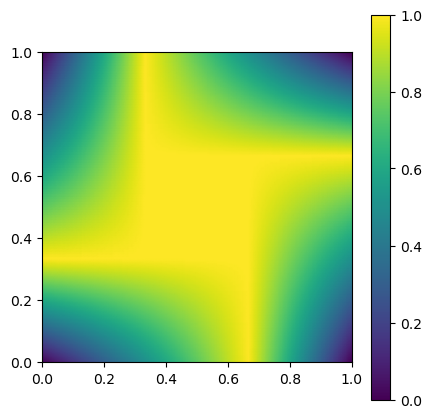

In [16]:
MP.plot(np.array([0,1,0,1,1,0,1,0]))

In [43]:
np.eye(1,5,2).ravel()

array([0., 0., 1., 0., 0.])

In [23]:
deg, N = 1,1
kvs = 2*[2 * (bspline.make_knots(deg, 0.0, 1.0, N),),]
geos=[
    geometry.unit_square(),
    geometry.unit_square().translate((1,0))
]
patches = [(k, g) for k, g in zip(kvs,geos)]
M = topology.PatchMesh(patches)
interfaces=[
    (0,((0,0),),1,((0,1),),((0,),(False,))),
    (0,((1,0),),2,((1,1),),((0,),(False,))),
    (0,((0,1),),3,((0,0),),((0,),(False,))),
    (0,((1,1),),4,((1,0),),((0,),(False,))),
    (1,((0,1),),2,((0,0),),((0,),(False,))),
    (2,((1,1),),3,((1,0),),((0,),(False,))),
    (3,((0,0),),4,((0,1),),((0,),(False,))),
    (4,((1,0),),1,((1,1),),((0,),(False,)))
]

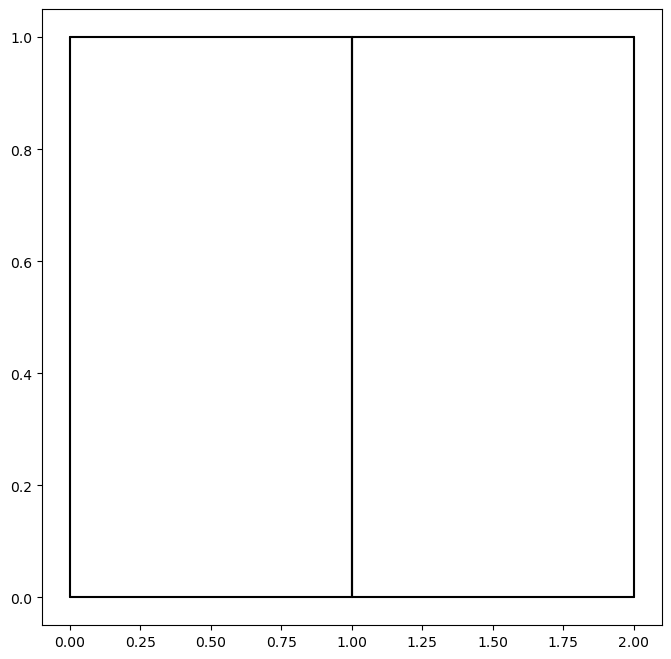

In [24]:
M.draw()

In [25]:
assemble.detect_interfaces(patches)[1][0]

(0, ((1, 1),), 1, ((1, 0),), ((0,), (False,)))

In [26]:
interfaces=[
    (0,((0,0),),1,((0,1),),((0,),(False,))),
    (0,((1,0),),2,((1,1),),((0,),(False,))),
    (0,((0,1),),3,((0,0),),((0,),(False,))),
    (0,((1,1),),4,((1,0),),((0,),(False,))),
    (1,((0,1),),2,((0,0),),((0,),(False,))),
    (2,((1,1),),3,((1,0),),((0,),(False,))),
    (3,((0,0),),4,((0,1),),((0,),(False,))),
    (4,((1,0),),1,((1,1),),((0,),(False,)))
]